In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')

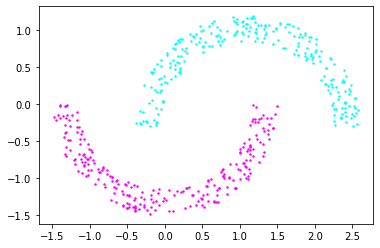

In [3]:
# simply visualising data
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)

In [4]:
# find parameters
u_1 = np.mean(X_1, axis = 0)
u_2 = np.mean(X_2, axis = 0)
s_1 = np.mean(np.cov(X_1.T))*np.eye(2, 2)
s_2 = np.mean(np.cov(X_2.T))*np.eye(2, 2)
pc_1 = X_1.shape[0]/(X_1.shape[0]+X_2.shape[0])
pc_2 = X_2.shape[0]/(X_1.shape[0]+X_2.shape[0])

In [5]:
# define functions g1, g2, g3
W11 = -(1/2)*np.linalg.pinv(s_1)
w11 = np.dot(np.linalg.pinv(s_1), u_1)
w10 = -(1/2)*np.dot(np.dot(u_1.T, np.linalg.pinv(s_1)), u_1)-(1/2)*np.log(np.linalg.det(s_1))+np.log(pc_1)

W21 = -(1/2)*np.linalg.pinv(s_2)
w21 = np.dot(np.linalg.pinv(s_2), u_2)
w20 = -(1/2)*np.dot(np.dot(u_2.T, np.linalg.pinv(s_2)), u_2)-(1/2)*np.log(np.linalg.det(s_2))+np.log(pc_2)

def g1(x):
    return np.dot(np.dot(np.transpose(x), W11), x)+np.dot(w11.T, x)+w10
def g2(x):
    return np.dot(np.dot(np.transpose(x), W21), x)+np.dot(w21.T, x)+w20

In [6]:
# classifier
def predict(x):
    return np.argmax([g1(x), g2(x)])

In [7]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((2, 2))
X = [X_1_test, X_2_test]
for i in range(2):
    for x in X[i]:
        ConfusionMatrix[predict(x), i] = ConfusionMatrix[predict(x), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2'],['True 1', 'True 2'])

,True 1,True 2
Predicted 1,87.0,17.0
Predicted 2,13.0,83.0


In [8]:
# performance measures
N = np.sum(ConfusionMatrix[:, 0])
TP = ConfusionMatrix[0, 0]
TN = ConfusionMatrix[1, 1]
FP = ConfusionMatrix[0, 1]
FN = ConfusionMatrix[1, 0]
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy,
})
print({
    'Precision: ': Precision,
})
print({
    'Recall: ': Recall,
})
print({
    'F_measure: ': F_measure,
})

{'Accuracy: ': 87.0}
{'Precision: ': 0.8365384615384616}
{'Recall: ': 0.87}
{'F_measure: ': 0.8529411764705882}


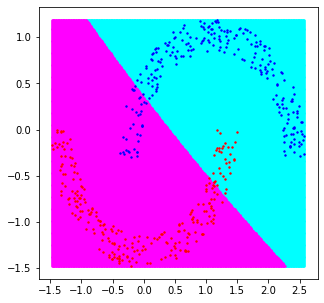

In [9]:
# Decision region plot for all the classes together with the training data superposed
x_min = min([min(X_1[:, 0]), min(X_2[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1])])
plt.rcParams['figure.figsize'] = [5, 5]
x_1 = []
x_2 = []
for x in np.arange(x_min, x_max, 0.01):
    for y in np.arange(y_min, y_max, 0.01):
        c = predict([x, y])
        if c == 0:
            x_1.append([x, y])
        elif c == 1:
            x_2.append([x, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'magenta', s = 2)
plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)